In [8]:
import requests

import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [9]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '2a75a6c17ce9459fb82f0ea744f109cb' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [10]:
teams = call_api('http://api.football-data.org/v1/competitions/444/teams', 'teams')
for team in teams:
    squadMarketValue = team['squadMarketValue']
    if not squadMarketValue:
        squadMarketValue = random.randint(10000000, 99999999)
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for fixture in fixtures:
        if team['name'] == fixture['homeTeamName']:
            if fixture['result']['goalsHomeTeam'] and fixture['result']['goalsAwayTeam']:
                if fixture['result']['goalsHomeTeam'] < fixture['result']['goalsAwayTeam']:                
                    losses += 1
        else:
            if fixture['result']['goalsHomeTeam'] and fixture['result']['goalsAwayTeam']:
                if fixture['result']['goalsAwayTeam'] < fixture['result']['goalsHomeTeam']:
                    losses += 1 if fixture['result']['goalsHomeTeam'] else 0
    team['squadMarketValue'] = squadMarketValue
    team['losses'] = losses    

team_for_pd = []
for team in teams:
    if team['losses']:
        team_for_pd.append({'name': team['name'], 'squadMarketValue': team['squadMarketValue'], 'losses': team['losses']})
teams_pd = pd.DataFrame(team_for_pd)
del teams_pd['name']

In [11]:
def draw_graph(segments_count, colors_map):
    centroids, cluster_map = kmeans2(whitened, segments_count)

    colors = [colors_map[c] for c in cluster_map]
    teams_pd.plot.scatter(x='squadMarketValue', y='losses', c=colors, s=50)

In [12]:
whitened = whiten(teams_pd.as_matrix())

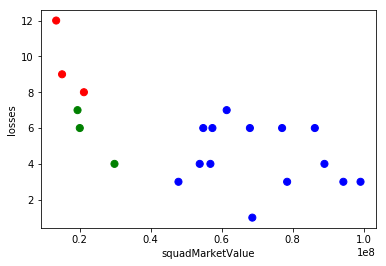

In [13]:
draw_graph(3, {0: 'r', 1: 'g', 2: 'b'})

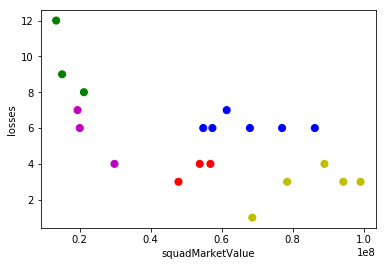

In [14]:
draw_graph(5, {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'})